In [20]:
#Set up matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
#Import all modules
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Get Python's SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [23]:
# Link to our database
hawaii = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# Reflect our database into a new model and reflect the tables.
reflect = automap_base()
reflect.prepare(autoload_with=hawaii)

In [25]:
# What classes did automap find?
reflect.classes.keys()

['measurement', 'station']

In [26]:
# Save the references to each table.
measurement=reflect.classes.measurement
station=reflect.classes.station


In [27]:
# Create our session (link) from Python to the database.
surf=Session(hawaii)

# Exploratory Precipitation Analysis

In [28]:
# What is the most recent date in our dataset?
surf.query(measurement.date).order_by(desc('date')).first()

('2017-08-23',)

In [29]:
# Design a query to retrieve the last year of precipitation data, and plot its results. Begin from the date we found above. 

# Calculate the date one year from that date.
makahiki=dt.date(2016,8,23)
# Perform a query to retrieve data and precipitation scores.
ua=surf.query(measurement.date,measurement.prcp).filter(measurement.date>=makahiki).all()

# Save the query results into a Pandas DataFrame and explicitly set the column names.
frame=pd.DataFrame([(i.date,i.prcp)for i in ua], columns=["Date","Precipitation"])
frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2230 non-null   object 
 1   Precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [30]:
#We need to remove the dates with no precipitation. You'll probably want to confirm with another info.
frame.dropna(inplace=True)
frame.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2021 non-null   object 
 1   Precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.4+ KB


In [32]:
# Sort the DataFrame by date and then use Pandas Plotting with Matplotlib to plot it
frame.sort_values("Date")
frame.Date=pd.to_datetime(frame.Date, format='%Y-%m-%d')

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


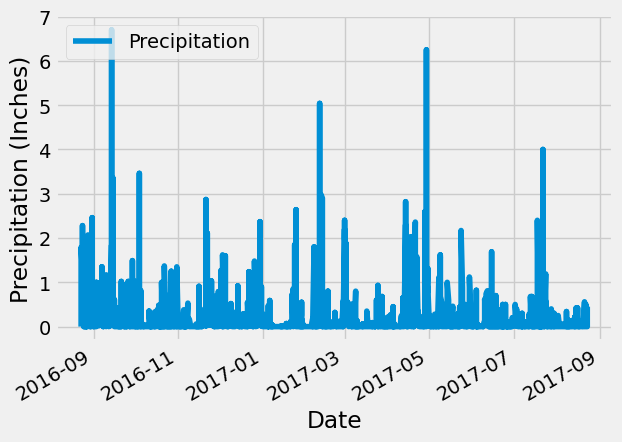

In [33]:
frame.plot(x="Date",xlabel="Date",ylabel="Precipitation (Inches)")
plt.legend(loc='upper left')
plt.show()

In [34]:
# Describe the precipitation data.
frame.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [36]:
# How many stations do we have?
surf.query(station).count()

9

In [38]:
# What stations are the most active (i.e. which ones have the most rows?), in descending order?
staquery=surf.query(measurement.station, func.count(measurement.id).label('count')).\
    group_by(measurement.station).\
        order_by(desc('count'))
allstas=staquery.all()
for station in allstas:
    print(station.station,station.count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive=surf.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
mostactive

[(54.0, 85.0, 71.66378066378067)]

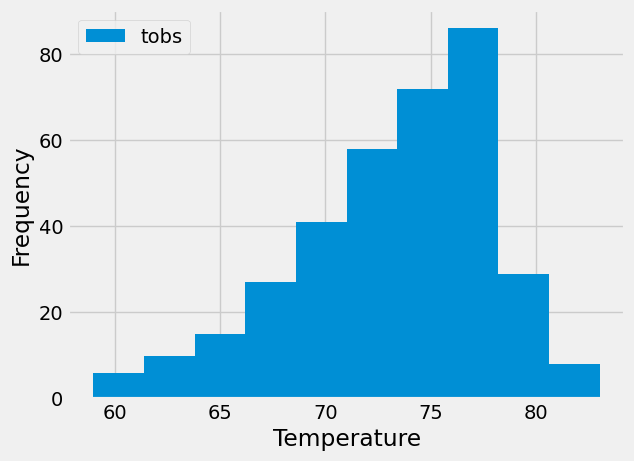

In [41]:
# Using the most active station id,
# Query the last year of temperature observation data for this station and plot the results as a histogram.
histo=surf.query(measurement.tobs).filter(measurement.date>=makahiki).filter(measurement.station=='USC00519281').all()
flat=np.array(histo).flatten()
plt.hist(flat)
plt.legend(["tobs"],loc="upper left")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [43]:
# Close the session
surf.close()